# Task 1: Exploratory Data Analysis (EDA)

## 1. Objective
Briefly describe the EDA objective.

## 2. Imports
Import all required libraries.

## 3. Data Loading
Load the car insurance dataset (e.g., `acis_insurance_data.csv`).

## 4. Initial Exploration
View structure, missing values, duplicates, etc.

## 5. Univariate Analysis
Explore individual features like premium, claims, etc.

## 6. Loss Ratio Analysis
Analyze loss ratio trends by time, car make/model, and region.

## 7. Visualizations
Use Matplotlib / Seaborn / Plotly to show findings.

## 8. Key Insights
Summarize insights gained from EDA.

## 9. Save Processed Data (Optional)
Save any cleaned/processed data for future tasks.


## 3. Data Loading
Load the car insurance dataset (e.g., `acis_insurance_data.csv`).

In [13]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Config
sns.set(style='whitegrid')
%matplotlib inline

# with open("../data/MachineLearningRating_v3.csv") as f:
#     lines = f.readlines()

# # Print line 1035 to 1037
# print(lines[1034:1037])


# Load the dataset
# Reload the data with correct delimiter
df = pd.read_csv('../data/MachineLearningRating_v3.csv', delimiter='|')

# Strip whitespace and show column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())


# Preview
df.head()


C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_11752\164213728.py:21: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.csv', delimiter='|')


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [27]:
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
display(df.head())


KeyboardInterrupt: 

In [15]:
# Missing values
missing = df.isnull().mean().sort_values(ascending=False)
display(missing[missing > 0] * 100)

# Data types
print(df.dtypes)


NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
Rebuilt                     64.183810
Converted                   64.183810
WrittenOff                  64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
VehicleType                  0.055195
make                         0.055195
mmcode                       0.055195
Model                        0.055195
Cylinders                    0.055195
bodytype                     0.055195
kilowatts                    0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
cubiccapacity                0.055195
CapitalOutstanding           0.000200
dtype: float64

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [19]:
# Calculate Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)


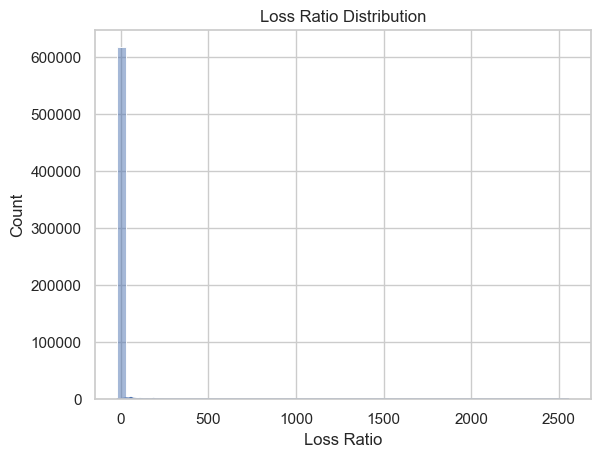

In [20]:
sns.histplot(df['LossRatio'].dropna(), bins=50, kde=True)
plt.title("Loss Ratio Distribution")
plt.xlabel("Loss Ratio")
plt.show()


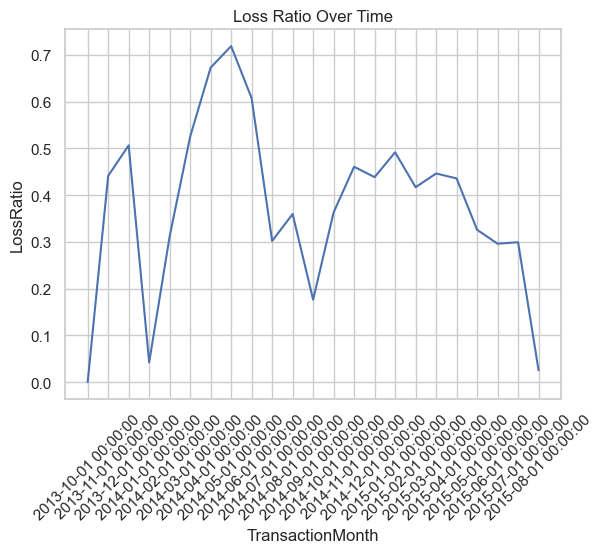

In [21]:
monthly = df.groupby('TransactionMonth')['LossRatio'].mean().reset_index()
sns.lineplot(data=monthly, x='TransactionMonth', y='LossRatio')
plt.xticks(rotation=45)
plt.title("Loss Ratio Over Time")
plt.show()


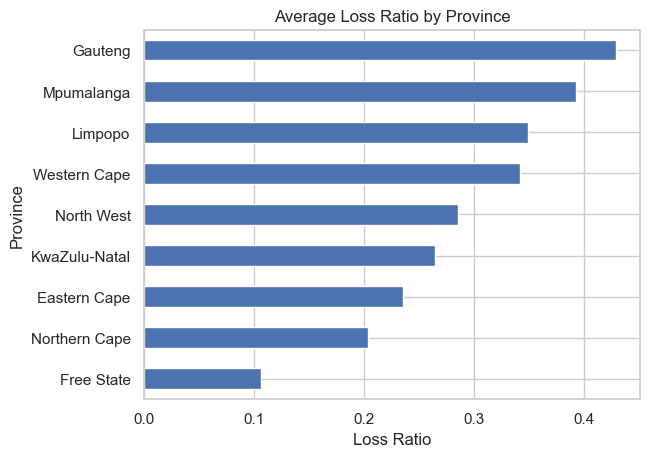

In [22]:
province_loss = df.groupby('Province')['LossRatio'].mean().sort_values()
province_loss.plot(kind='barh', title='Average Loss Ratio by Province')
plt.xlabel("Loss Ratio")
plt.show()


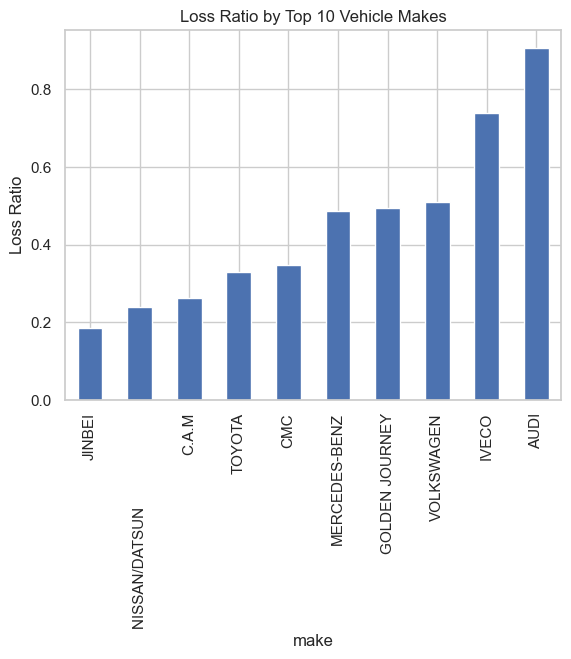

In [24]:
top_makes = df['make'].value_counts().head(10).index
make_loss = df[df['make'].isin(top_makes)].groupby('make')['LossRatio'].mean()
make_loss.sort_values().plot(kind='bar', title='Loss Ratio by Top 10 Vehicle Makes')
plt.ylabel("Loss Ratio")
plt.show()


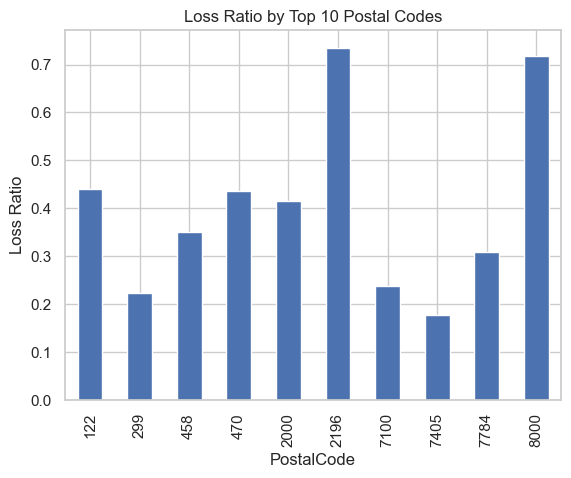

In [26]:
top_zips = df['PostalCode'].value_counts().head(10).index
zip_loss = df[df['PostalCode'].isin(top_zips)].groupby('PostalCode')['LossRatio'].mean()
zip_loss.plot(kind='bar', title='Loss Ratio by Top 10 Postal Codes')
plt.ylabel("Loss Ratio")
plt.show()
